## Cluster Analysis

### Cluster Analysis includes making use of clustering algorithms with the aim of locating hidden styles or groupings for the duration of a dataset. it is consequently used often in exploratory information evaluation, however is moreover used for anomaly detection and preprocessing for supervised learning.

Clustering algorithms form groupings in such how that data within a bunch (or cluster) have subsequent measure of similarity than data within the other cluster. Various similarity measures will be used, including Euclidean, probabilistic, cosine distance, and correlation. Most unsupervised learning methods are a variety of cluster analysis.

### Types of Clustering

# 1.Hierarchial Clustering

### Import Required Libraries

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline
import numpy as np

### Load the Dataset

In [2]:
customer_data = pd.read_csv('C:/Users/S_The/Downloads/shopping-data.csv')
customer_data.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [3]:
customer_data.shape

(200, 5)

In [4]:
data = customer_data.iloc[:, 3:5].values

**Next, we need to know the clusters that we want our data to be split to. We will again use the scipy library to create the dendrograms for our dataset.**

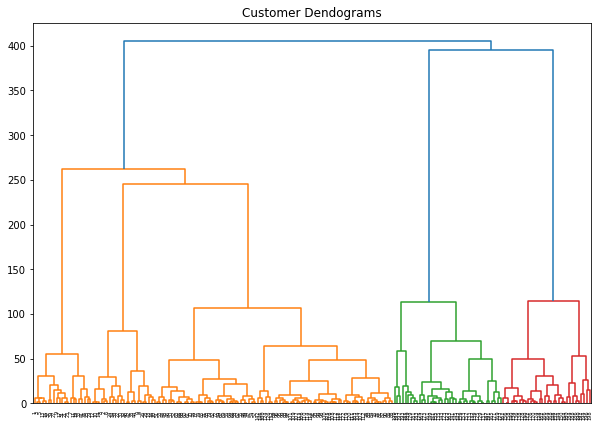

In [5]:
import scipy.cluster.hierarchy as shc

plt.figure(figsize=(10, 7))
plt.title("Customer Dendograms")
dend = shc.dendrogram(shc.linkage(data, method='ward'))

**Now we know the number of clusters for our dataset, the next step is to group the data points into these five clusters. To do so we will again use the AgglomerativeClustering class of the sklearn.cluster library.**

In [6]:
from sklearn.cluster import AgglomerativeClustering

cluster = AgglomerativeClustering(n_clusters=5, affinity='euclidean', linkage='ward')
cluster.fit_predict(data)

array([4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3,
       4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 1,
       4, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 1, 2, 0, 2, 0, 2,
       1, 2, 0, 2, 0, 2, 0, 2, 0, 2, 1, 2, 0, 2, 1, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 1, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2], dtype=int64)

**As a final step, let's plot the clusters to see how actually our data has been clustered:**

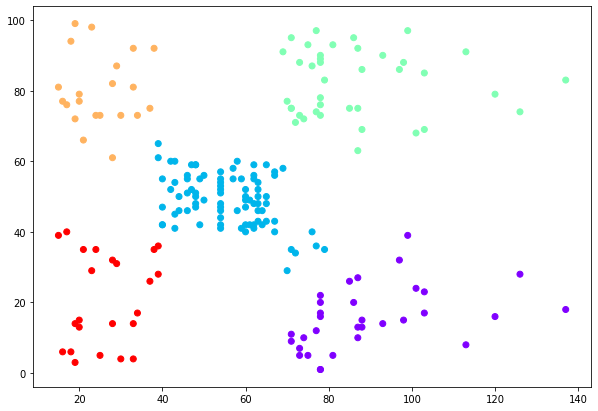

In [7]:
plt.figure(figsize=(10, 7))
plt.scatter(data[:,0], data[:,1], c=cluster.labels_, cmap='rainbow')

# 2.K means Clustering

### Import Required Libraries

In [12]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from matplotlib import pyplot as plt
from copy import deepcopy

### Generate Random Data

*Generate random data normally distributed around 3 centers, with a noise.*

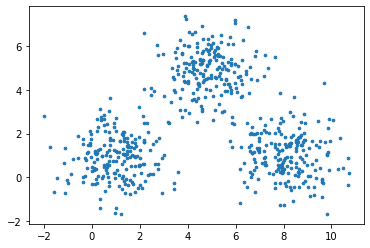

In [13]:
center_1 = np.array([1,1])
center_2 = np.array([5,5])
center_3 = np.array([8,1])

# Generate random data and center it to the three centers
data_1 = np.random.randn(200, 2) + center_1
data_2 = np.random.randn(200,2) + center_2
data_3 = np.random.randn(200,2) + center_3

data = np.concatenate((data_1, data_2, data_3), axis = 0)

plt.scatter(data[:,0], data[:,1], s=7)

### Create K-Means Algorithm

*Generate random data normally distributed around 3 centers, with a noise.*

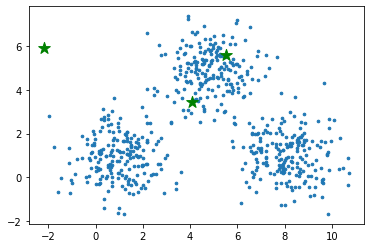

In [14]:
# Number of clusters
k = 3
# Number of training data
n = data.shape[0]
# Number of features in the data
c = data.shape[1]

# Generate random centers, here we use sigma and mean to ensure it represent the whole data
mean = np.mean(data, axis = 0)
std = np.std(data, axis = 0)
centers = np.random.randn(k,c)*std + mean

# Plot the data and the centers generated as random
plt.scatter(data[:,0], data[:,1], s=7)
plt.scatter(centers[:,0], centers[:,1], marker='*', c='g', s=150)

In [15]:
centers_old = np.zeros(centers.shape) # to store old centers
centers_new = deepcopy(centers) # Store new centers

data.shape
clusters = np.zeros(n)
distances = np.zeros((n,k))

error = np.linalg.norm(centers_new - centers_old)

# When, after an update, the estimate of that center stays the same, exit loop
while error != 0:
    # Measure the distance to every center
    for i in range(k):
        distances[:,i] = np.linalg.norm(data - centers[i], axis=1)
    # Assign all training data to closest center
    clusters = np.argmin(distances, axis = 1)
    
    centers_old = deepcopy(centers_new)
    # Calculate mean for every cluster and update the center
    for i in range(k):
        centers_new[i] = np.mean(data[clusters == i], axis=0)
    error = np.linalg.norm(centers_new - centers_old)
centers_new    

array([[-0.89749019,  1.17827139],
       [ 4.42290851,  1.33538485],
       [ 5.82824765,  4.84737045]])

### Plot the data and the centers generated as random

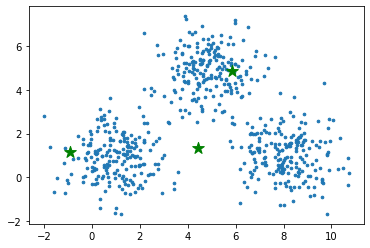

In [16]:
plt.scatter(data[:,0], data[:,1], s=7)
plt.scatter(centers_new[:,0], centers_new[:,1], marker='*', c='g', s=150)

# 3.Spatial Clustering(DBSCAN)

### Import Required Libraries

In [30]:
import numpy as np
import pandas as pd

### Load the Dataset

In [32]:
dataset = pd.read_csv('C:/Users/S_The/Downloads/Mall_Customers.csv')
X = dataset.iloc[:, [3, 4]].values

In [33]:
from sklearn.cluster import DBSCAN
dbscan=DBSCAN(eps=3,min_samples=4)

In [34]:
model=dbscan.fit(X)

labels=model.labels_

In [35]:
from sklearn import metrics

In [36]:
sample_cores=np.zeros_like(labels,dtype=bool)

sample_cores[dbscan.core_sample_indices_]=True

In [37]:
n_clusters=len(set(labels))- (1 if -1 in labels else 0)

In [38]:
print(metrics.silhouette_score(X,labels))

-0.1908319132560097


# 4.Spectral Clustering

### Importing the required libraries

In [39]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import SpectralClustering
from sklearn.preprocessing import StandardScaler, normalize
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score

### Loading and Cleaning the Data

In [41]:
X = pd.read_csv('C:/Users/S_The/Downloads/CC GENERAL.csv')

In [42]:
# Dropping the CUST_ID column from the data
X = X.drop('CUST_ID', axis = 1)

In [43]:
# Handling the missing values if any
X.fillna(method ='ffill', inplace = True)
  
X.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,627.284787,0.000000,12
4,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


### Data Preprocessing

In [44]:
# Preprocessing the data to make it visualizable
  
# Scaling the Data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
  
# Normalizing the Data
X_normalized = normalize(X_scaled)
  
# Converting the numpy array into a pandas DataFrame
X_normalized = pd.DataFrame(X_normalized)
  
# Reducing the dimensions of the data
pca = PCA(n_components = 2)
X_principal = pca.fit_transform(X_normalized)
X_principal = pd.DataFrame(X_principal)
X_principal.columns = ['P1', 'P2']
  
X_principal.head()

,P1,P2
0,-0.489949,-0.679976
1,-0.519099,0.544828
2,0.330633,0.268880
3,-0.481656,-0.097616
4,-0.563512,-0.482505


### Building the Clustering models and Visualizing the clustering

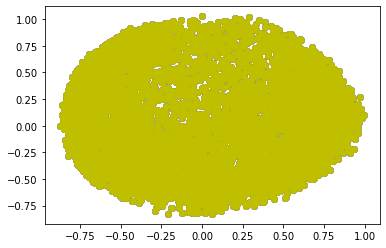

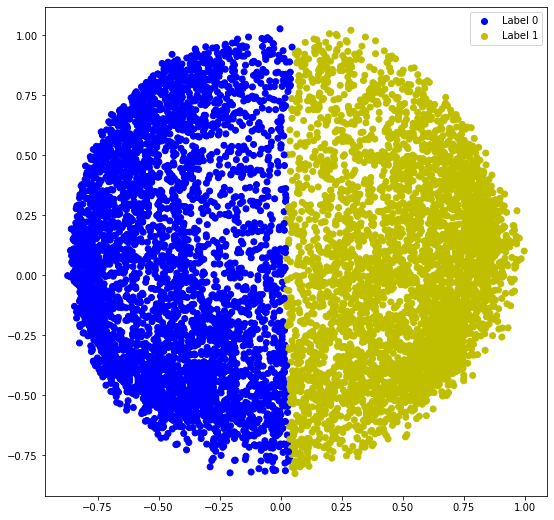

In [46]:
# Building the clustering model
spectral_model_rbf = SpectralClustering(n_clusters = 2, affinity ='rbf')
  
# Training the model and Storing the predicted cluster labels
labels_rbf = spectral_model_rbf.fit_predict(X_principal)
# Building the label to colour mapping
colours = {}
colours[0] = 'b'
colours[1] = 'y'
  
# Building the colour vector for each data point
cvec = [colours[label] for label in labels_rbf]
  
# Plotting the clustered scatter plot
  
b = plt.scatter(X_principal['P1'], X_principal['P2'], color ='b');
y = plt.scatter(X_principal['P1'], X_principal['P2'], color ='y');
  
plt.figure(figsize =(9, 9))
plt.scatter(X_principal['P1'], X_principal['P2'], c = cvec)
plt.legend((b, y), ('Label 0', 'Label 1'))
plt.show()